# Анализ данных, вариант №1

## Импорт модулей

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import seaborn as sns

## Подготовка загрузки

In [54]:
URL_DATASET = 'https://drive.google.com/uc?id=1GR1d3h3mVE8ZFRzrqY2qVE__hGzB9ZTQ'

In [55]:
def load_dataset(csv_path):
    return pd.read_csv(csv_path)

In [56]:
data = load_dataset(URL_DATASET)
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [57]:
# При экспорте добавился nan столбец в конце данных
data = data.drop(data.columns[32], axis=1)
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
# проверка уникальности id
data[data.duplicated(subset=['id'])]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [60]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [61]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


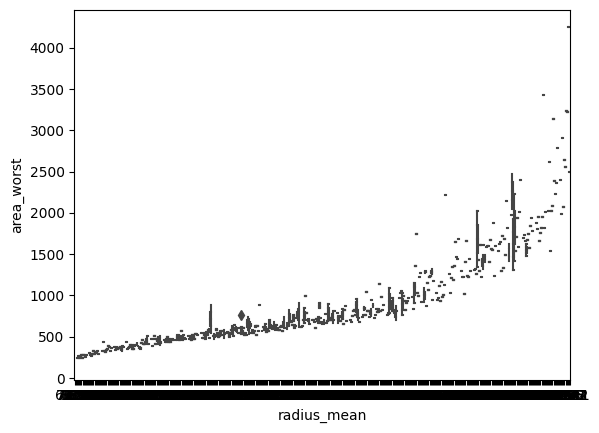

In [62]:
sns.boxplot(x=data['radius_mean'], y=data['area_worst']);

In [63]:
data['radius_mean'].value_counts()

12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: radius_mean, Length: 456, dtype: int64

In [64]:
%matplotlib inline

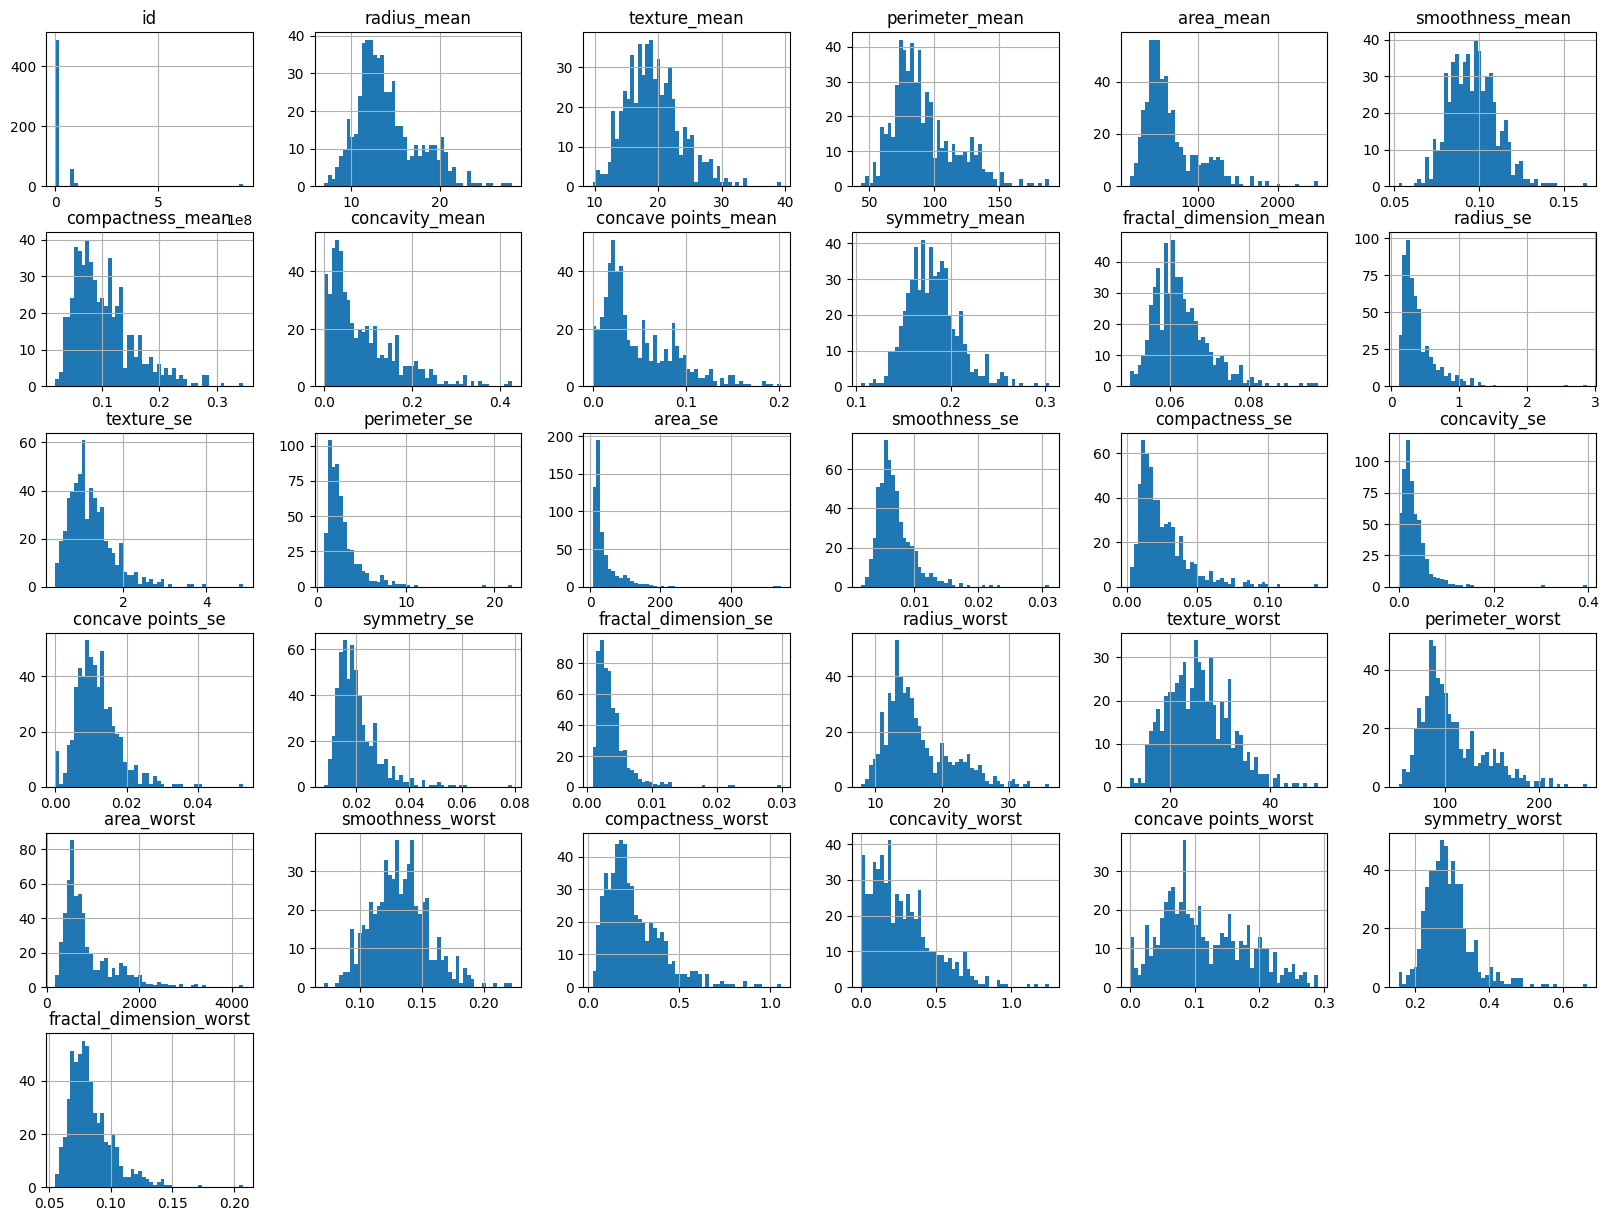

In [65]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [66]:
print("Median worst symmetry range:", data["symmetry_worst"].min(), data["symmetry_worst"].max())
print("Texture mean median range:", data["texture_mean"].min(),data["texture_mean"].max())
print("Median worst area range:", data['area_worst'].min(),data['area_worst'].max())

Median worst symmetry range: 0.1565 0.6638
Texture mean median range: 9.71 39.28
Median worst area range: 185.2 4254.0


## Создание тестового набора данных

In [67]:
#упрощенный вариант train_test_split
def split_train_test(data,test_ratio,random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(data,0.2)
print("Train set length:", len(train_set))
print("Test set length:", len(test_set))

Train set length: 456
Test set length: 113


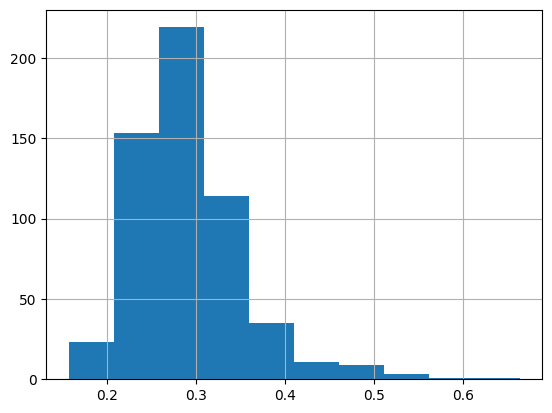

In [68]:
data['symmetry_worst'].hist();

In [69]:
data['symmetry_worst'] = pd.cut(data['area_worst'],bins=[0,4.5,9.5,10.5,11.5,12.5, np.inf], labels=[3,4,5,6,7,8])

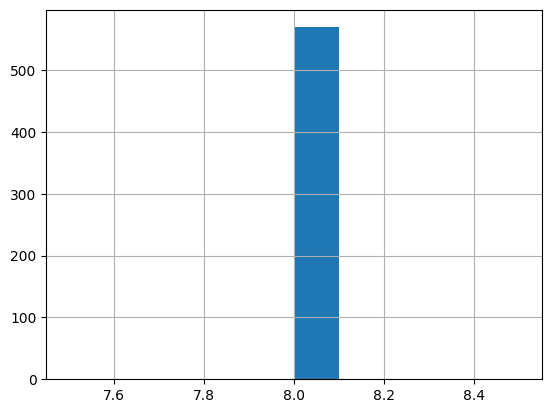

In [70]:
data['symmetry_worst'].hist();

### Стратификационная выборка

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data,data['symmetry_worst']):
    print(train_index)
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

[479  83  50 503  41 467 434 336 384 548  51 158 349 514  19 112 469  46
 200   5 147 234 155 265 354 367 517 565 119  32 492 302 335 282 140  37
  15 486 196 271  10 364 396 244 194 176 531   9 371 115 328 443   0 405
 453  97  36 143 181 457 374  70 277 199 254 154 404 321 139 235 442 470
 551 545  95 145 425 206   2 262 431 480 468 116 142 267 424 149 419 239
  39  88 398 342  45 377 397 463  90 306 268 289 441  89 118 359  78 229
 126 165 179 172 451  28 257 415 547 129 157 198 197 182 253 382 462 527
 209 338 502 556 351  96 131 488 193 433 278 506  33 152 123 368 568 117
 498  74 238 312 247  55 192 381 195 557 436 163 561 464 290 263  76 395
 541 275 286 346 412 456 202 173 432 559 465 394  25  35 526 505  73 120
 307 324  79 521 294 500 231 110 213 174 301 408 471 183 323 450 543 403
 114 220  75  68 422 292 186 388 327 316  98 250 511 515 266 141 245 524
  85 297 132 496 530 513 519 113 363  47 180 392 544 376 144  72 150 546
 284 281  66 481 426  77 399 538 228  18 168 219 30

In [72]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("symmetry_worst",axis=1,inplace=True)

In [73]:
data = strat_train_set.copy()

c:\Users\tsyganova\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


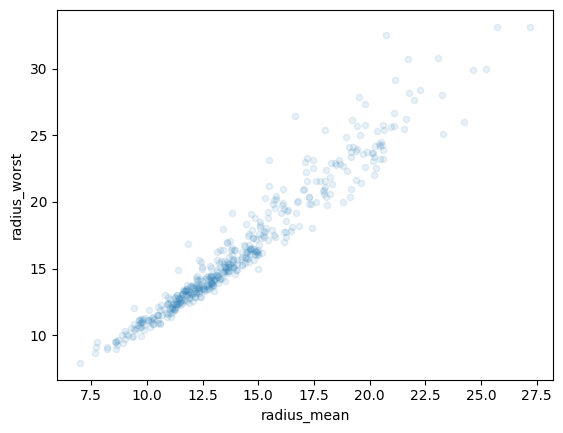

In [74]:
#диаграмма рассеяния
data.plot(kind='scatter',x='radius_mean',y = 'radius_worst',alpha = 0.1);

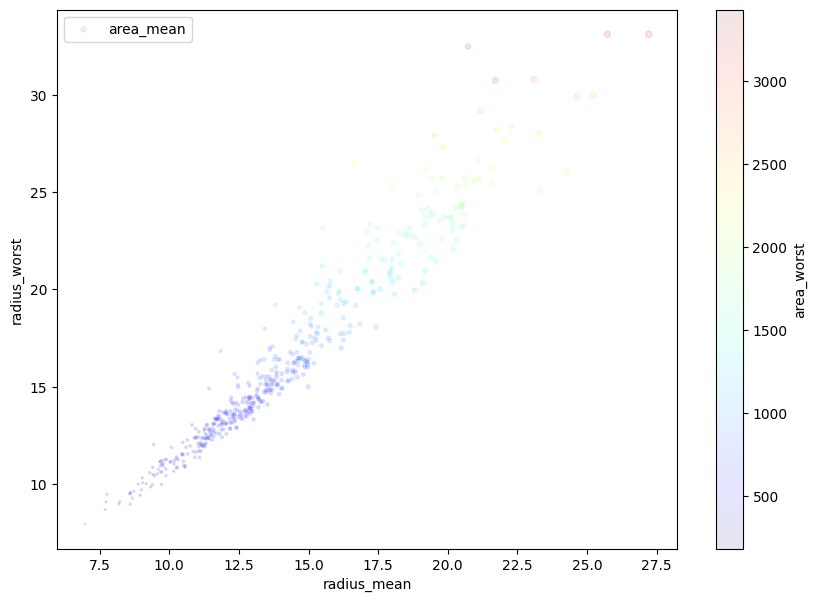

In [75]:
data.plot(kind='scatter',x='radius_mean',y = 'radius_worst',alpha = 0.1,s=data['area_mean']/100,label='area_mean',figsize=(10,7),c='area_worst',cmap = plt.get_cmap('jet'),colorbar=True)
plt.legend()

In [76]:
import seaborn as sns

In [77]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
479,911916,M,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,...,0.006355,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.09136
83,8611792,M,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,...,0.010390,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.09203
50,857343,B,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,...,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.06563
503,915143,M,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,...,0.002897,30.79,23.87,211.50,2782.0,0.1199,0.36250,0.37940,0.22640,0.07277
41,855563,M,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,0.003040,12.84,35.34,87.22,514.0,0.1909,0.26980,0.40230,0.14240,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,0.002496,15.14,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.07623
24,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,0.002801,26.46,31.56,177.00,2215.0,0.1805,0.35780,0.46950,0.20950,0.09564
218,8811842,M,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,...,0.004045,25.73,28.64,170.30,2009.0,0.1353,0.32350,0.36170,0.18200,0.08255
420,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,0.003339,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.08284


In [78]:
corr_matrix = data.corr()
corr_matrix['fractal_dimension_worst'].sort_values(ascending=False)

fractal_dimension_worst    1.000000
compactness_worst          0.801568
fractal_dimension_mean     0.769070
concavity_worst            0.685369
compactness_mean           0.680181
fractal_dimension_se       0.597751
compactness_se             0.597684
smoothness_worst           0.584451
concavity_mean             0.534139
concave points_worst       0.510614
smoothness_mean            0.471557
concavity_se               0.449132
symmetry_mean              0.431381
concave points_mean        0.387950
concave points_se          0.339784
texture_worst              0.206483
perimeter_se               0.158993
perimeter_worst            0.153707
texture_mean               0.127884
radius_se                  0.110348
smoothness_se              0.105574
radius_worst               0.105357
symmetry_se                0.101667
area_worst                 0.094375
area_se                    0.085009
perimeter_mean             0.068555
area_mean                  0.025081
radius_mean                0

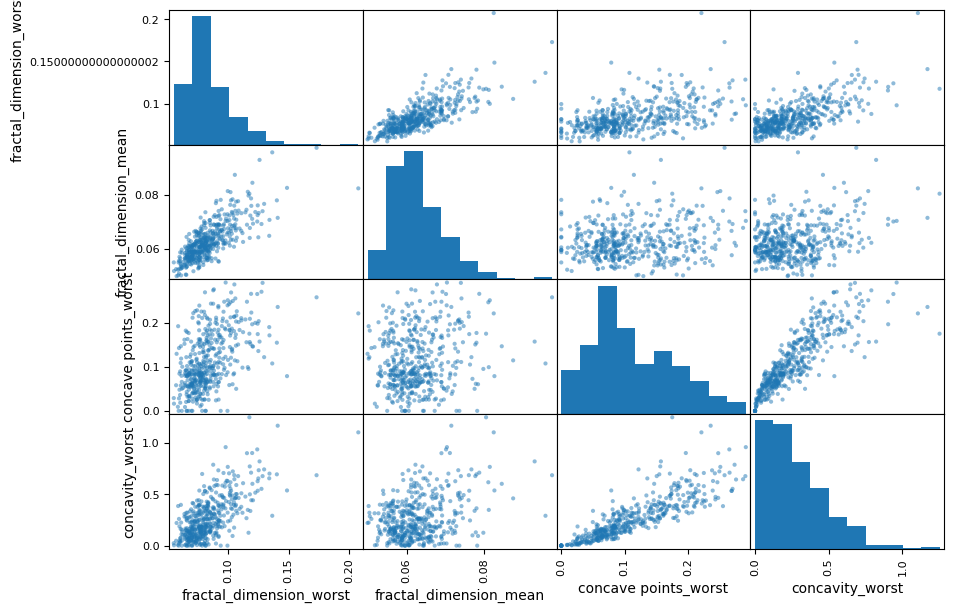

In [79]:
from pandas.plotting import scatter_matrix

attributes = ['fractal_dimension_worst','fractal_dimension_mean','concave points_worst','concavity_worst']
scatter_matrix(data[attributes],figsize=(10,7));

In [80]:
data.drop('diagnosis',axis = 1)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
479,911916,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,0.2151,...,0.006355,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.09136
83,8611792,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,0.010390,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.09203
50,857343,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,...,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.06563
503,915143,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,...,0.002897,30.79,23.87,211.50,2782.0,0.1199,0.36250,0.37940,0.22640,0.07277
41,855563,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,0.1895,...,0.003040,12.84,35.34,87.22,514.0,0.1909,0.26980,0.40230,0.14240,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,8813129,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,...,0.002496,15.14,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.07623
24,852552,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,0.1995,...,0.002801,26.46,31.56,177.00,2215.0,0.1805,0.35780,0.46950,0.20950,0.09564
218,8811842,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,0.2094,...,0.004045,25.73,28.64,170.30,2009.0,0.1353,0.32350,0.36170,0.18200,0.08255
420,906539,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,...,0.003339,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.08284


## Комбинирование признаков

In [81]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,fractal_dimension_worst
479,911916,M,16.25,19.51,109.80,815.8,0.10260,0.18930,0.22360,0.09194,...,0.006355,17.39,23.05,122.10,939.7,0.1377,0.44620,0.58970,0.17750,0.09136
83,8611792,M,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,...,0.010390,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.09203
50,857343,B,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,...,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.06563
503,915143,M,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,...,0.002897,30.79,23.87,211.50,2782.0,0.1199,0.36250,0.37940,0.22640,0.07277
41,855563,M,10.95,21.35,71.90,371.1,0.12270,0.12180,0.10440,0.05669,...,0.003040,12.84,35.34,87.22,514.0,0.1909,0.26980,0.40230,0.14240,0.09606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,8813129,B,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,...,0.002496,15.14,23.60,98.84,708.8,0.1276,0.13110,0.17860,0.09678,0.07623
24,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.15250,0.09170,...,0.002801,26.46,31.56,177.00,2215.0,0.1805,0.35780,0.46950,0.20950,0.09564
218,8811842,M,19.80,21.56,129.70,1230.0,0.09383,0.13060,0.12720,0.08691,...,0.004045,25.73,28.64,170.30,2009.0,0.1353,0.32350,0.36170,0.18200,0.08255
420,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,...,0.003339,13.07,26.98,86.43,520.5,0.1249,0.19370,0.25600,0.06664,0.08284


In [82]:
corr_matrix = data.corr()
corr_matrix['area_se'].sort_values(ascending=False)

area_se                    1.000000
radius_se                  0.957791
perimeter_se               0.929160
area_worst                 0.873167
perimeter_worst            0.843881
radius_worst               0.841191
area_mean                  0.822123
perimeter_mean             0.797160
radius_mean                0.787370
concave points_mean        0.767503
concavity_mean             0.656933
concave points_worst       0.641233
compactness_mean           0.551221
concave points_se          0.469422
concavity_worst            0.444297
compactness_worst          0.388990
compactness_se             0.358960
texture_mean               0.309577
symmetry_mean              0.304731
smoothness_mean            0.292135
texture_worst              0.273189
concavity_se               0.268426
smoothness_worst           0.192787
fractal_dimension_se       0.165076
texture_se                 0.129033
symmetry_se                0.090498
fractal_dimension_worst    0.085009
id                         0

In [83]:
needed_features = ['texture_worst', 'area_worst', 'radius_se', 
'texture_se', 'compactness_mean', 'compactness_worst','diagnosis', 
'symmetry_worst']

In [89]:
data = strat_train_set.drop('diagnosis',axis=1)
diagnosis_labels = strat_train_set['diagnosis'].copy()

In [90]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # cчитается на числовых признаках, придется вручную откидывать нечисловые признаки

In [91]:
data_num = data.drop('area_worst',axis = 1)
imputer.fit(data_num)
imputer.statistics_ == data_num.median().values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [92]:
X = imputer.transform(data_num)

In [95]:
data_category =data[['area_worst']]
data_category

,area_worst
479,939.7
83,1298.0
50,516.5
503,2782.0
41,514.0
...,...
224,708.8
24,2215.0
218,2009.0
420,520.5


In [96]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [97]:
category_encoded = ordinal_encoder.fit_transform(data_category)
category_encoded[:10]

array([[311.],
       [357.],
       [119.],
       [436.],
       [115.],
       [ 45.],
       [264.],
       [164.],
       [195.],
       [ 36.]])

In [98]:
ordinal_encoder.categories_

[array([ 185.2,  223.6,  240.1,  242.2,  248. ,  249.8,  259.2,  268.6,
         270. ,  273.9,  274.9,  275.6,  284.4,  285.5,  295.8,  297.1,
         301. ,  302. ,  303.8,  310.1,  324.7,  326.6,  328.1,  330.6,
         330.7,  331.6,  335.9,  342.9,  347.3,  351.9,  353.6,  357.4,
         357.6,  359.4,  361.2,  362.7,  364.2,  366.1,  366.3,  367. ,
         368.6,  374.4,  375.6,  376.3,  376.5,  380.2,  380.5,  380.9,
         384. ,  384.9,  385.2,  390.2,  390.4,  392.2,  394.5,  395.4,
         396.5,  402.8,  407.5,  408.3,  411.1,  412.3,  421.1,  424.8,
         434. ,  436.1,  436.6,  437. ,  439.6,  440. ,  440.4,  440.8,
         441.2,  447.1,  450. ,  452.3,  453.5,  455.7,  457.5,  457.8,
         458. ,  459.3,  462. ,  466.7,  467.2,  470. ,  470.9,  471.4,
         472.4,  472.9,  474.2,  475.7,  475.8,  476.1,  476.4,  476.5,
         478.6,  483.1,  488.4,  489.5,  489.8,  491.8,  492.7,  495.1,
         495.2,  496.2,  496.7,  503. ,  505.6,  506.2,  507.2, 

In [99]:
from sklearn.preprocessing import OneHotEncoder
onehotEnconder = OneHotEncoder()
data_category_one_hot = onehotEnconder.fit_transform(data_category)
data_category_one_hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Собственный трансформер

In [100]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_idx = 3,4,5,6


class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = False):
        self.add_bedrooms_per_room =add_bedrooms_per_room

    def fit(self,X,y = None):
        return self

    def transform(self,X,y=None):
        rooms_per_household = X[:, rooms_ix] / X[:,households_idx]
        population_per_household = X[:, population_ix] / X[:,households_idx]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]




In [101]:
additive_transformer = CombinedAttributeAdder(add_bedrooms_per_room = False)
data_extra_attributes = additive_transformer.transform(data.values)

In [102]:
data_extra_attributes

array([[9.11916000e+05, 1.62500000e+01, 1.95100000e+01, ...,
        9.13600000e-02, 5.80031696e+02, 5.41996830e-01],
       [8.61179200e+06, 1.91000000e+01, 2.62900000e+01, ...,
        9.20300000e-02, 7.20826354e+02, 6.78391960e-01],
       [8.57343000e+05, 1.17600000e+01, 2.16000000e+01, ...,
        6.56300000e-02, 1.50463149e+03, 1.73922674e+00],
       ...,
       [8.81184200e+06, 1.98000000e+01, 2.15600000e+01, ...,
        8.25500000e-02, 9.93108729e+02, 7.18453292e-01],
       [9.06539000e+05, 1.15700000e+01, 1.90400000e+01, ...,
        8.28400000e-02, 9.60890961e+02, 1.10670811e+00],
       [8.83263000e+05, 2.04800000e+01, 2.14600000e+01, ...,
        7.12700000e-02, 1.58720652e+03, 1.00083852e+00]])

## Конвейризация

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [104]:
pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributeAdder()),
    ('std_scaler', StandardScaler())
])

data_num_transformed = pipeline.fit_transform(data_num)

In [105]:
data_num_transformed

array([[-0.24694932,  0.63150486,  0.04742006, ...,  0.40731835,
        -1.02129423, -1.25383185],
       [-0.18882984,  1.45079222,  1.66580878, ...,  0.4447751 ,
        -0.70633482, -0.95416209],
       [-0.24736125, -0.65923206,  0.5463039 , ..., -1.03113266,
         1.04704704,  1.37656715],
       ...,
       [-0.18731984,  1.65202069,  0.53675589, ..., -0.08520996,
        -0.09723576, -0.8661445 ],
       [-0.24698991, -0.71385122, -0.06476912, ..., -0.06899734,
        -0.16930731, -0.01312114],
       [-0.2471656 ,  1.84749978,  0.51288585, ..., -0.71582509,
         1.23176839, -0.24572412]])

In [107]:
from sklearn.compose import ColumnTransformer
num_attributes = list(data_num)
cat_attributes = ['radius_worst']

full_pipeline = ColumnTransformer([
    ("num", pipeline,num_attributes),
    ("cat", OneHotEncoder(),cat_attributes)
])


data_prepared = full_pipeline.fit_transform(data)